# Imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
import gzip
import shutil
import json
# from skimpy import skim
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import shapiro
from sklearn.metrics import adjusted_rand_score , normalized_mutual_info_score , silhouette_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from collections import Counter, defaultdict
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from fastai.imports import *
from fastai.tabular import *
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#from flaml import AutoML
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, VotingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score, mean_absolute_error
import pandas_profiling as pp
from collections import Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import plotly.express as px
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer, SimpleImputer
import matplotlib.colors as mcolors
import math
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import  BaggingRegressor,   GradientBoostingRegressor, StackingRegressor

# Functions

In [2]:
def split_cols(df):
    numeric_cols = [i for i in df.columns if df[i].dtype == int or df[i].dtype == float]
    cat_cols = [i for i in df.columns if i not in numeric_cols]
    return numeric_cols, cat_cols

In [3]:
def plot(X, Y, x_label='X', y_label='Y', title='Scatter Plot'):
    unique_labels = set(Y)
    colors = {label: plt.cm.jet(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
    for label in unique_labels:
        mask = (Y == label)
        plt.scatter(X[mask, 0], X[mask, 1], label=f'Label {label}', color=colors[label], edgecolors='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.axis('equal') 
    plt.xlim(X[:, 0].min() - 5, X[:, 0].max() + 5)
    plt.ylim(X[:, 1].min() - 5, X[:, 1].max() + 5)
    plt.show()

In [4]:
def cov_matrix(df):
    cols = len(df.columns)
    cov_matrix = np.zeros((cols, cols))
    df_temp = df - np.mean(df, axis=0)
    rows = df_temp.shape[0]
    
    for i in range(cols):
        for j in range(cols):
            cov_matrix[i][j] = np.sum(df_temp.iloc[:, i] * df_temp.iloc[:, j]) / (rows - 1)
    
    return cov_matrix

In [5]:
def getEigens(cov_mat):
    return np.linalg.eigh(cov_mat)

In [6]:
def PCA(cov_mat , K = 3):
    eigenvalues, eigenvectors = getEigens(cov_mat)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    return eigenvectors [: , : K]

In [7]:
df = pd.read_csv("/kaggle/input/phone-classification-dataset/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
Y = df['price_range']
df.drop(columns = 'price_range',inplace = True)
X = df.values
cov_matrix = cov_matrix(df)
cov_matrix.shape

(20, 20)

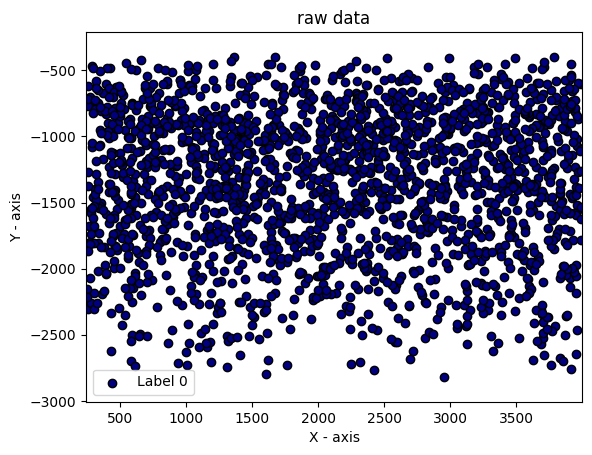

In [9]:
Q_plot = PCA(cov_matrix , 2)
X_plot = np.dot(X , Q_plot)
plot(X_plot , np.full(len(X) , 0) , 'X - axis' , 'Y - axis' , 'raw data')

# DBSCAN FUNCTIONS

In [10]:
def Neighbours(point , ep , dist):
    neighbours = []
    for i in range(len(dist)):
        if dist[point][i] <= ep and i != point:
            neighbours.append(i)
    return neighbours

In [11]:
def cal_distacne(X):
    n = len(X)
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist[i][j] = np.linalg.norm(X[i] - X[j]) # Euclidean distance
    return dist

In [12]:
def Expand(point , dist , ep , core , Y_hat , clus):
    stack = [point]
    Y_hat[point] = clus
    while len(stack) != 0:
        cur_core = stack.pop()
        nei = Neighbours(cur_core , ep , dist)
        for ne in nei:
            if Y_hat[ne] == -1:
                if core[ne] == True:
                    stack.append(ne)
                Y_hat[ne] = clus

In [13]:
def DBSCAN(X , ep , minPts):
    n = len(X)
    dist = cal_distacne(X)
    Y_hat = np.full(n , -1)
    core = np.full(n , False)
    noise = []

    # finding cores
    for i in range(n):
        if len( Neighbours(i ,ep , dist ) ) >= minPts:
            core[i] = True
    
    # clustring
    cur_cluster = -1
    for i in range(n):
        if core[i] and Y_hat[i] == -1:
            cur_cluster = cur_cluster + 1
            Expand(i , dist , ep , core , Y_hat , cur_cluster)
            
    # finding noise
    for i in range(n):
        if Y_hat[i] == -1:
            noise.append(i)
            
    return cur_cluster + 1 , Y_hat , noise 

#  DBSCAN on original data

In [14]:
size , Y_hat , noise  = DBSCAN(X, 330 ,8)

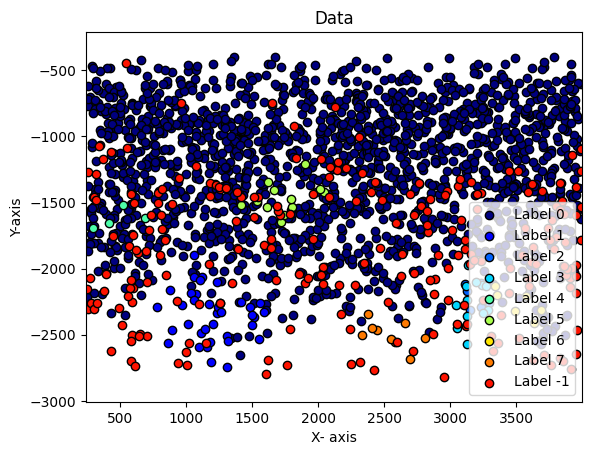

number of noise = 225


In [15]:
plot(X_plot , Y_hat ,'X- axis' , 'Y-axis' , 'Data')
print("number of noise =", len(noise))

#  DBSCAN on compressed data

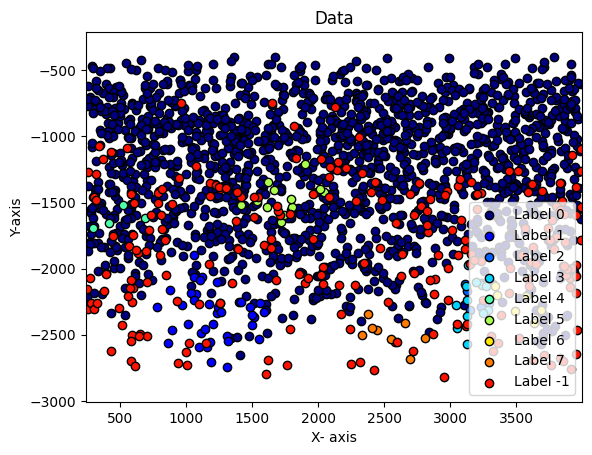

number of noise = 223


In [16]:
Q_mat = PCA(cov_matrix , 12) 
comp_X = np.dot(X , Q_mat) 
size , Y_hat , noise  = DBSCAN(comp_X , 330, 8)

plot(X_plot , Y_hat ,'X- axis' , 'Y-axis' , 'Data')
print("number of noise =", len(noise))

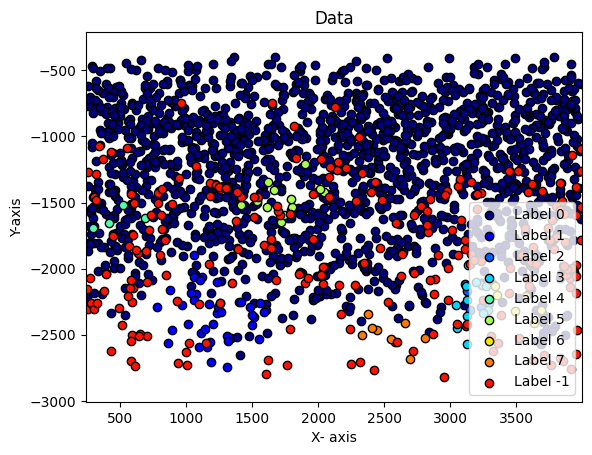

number of noise = 221


In [17]:
Q_mat = PCA(cov_matrix , 8) 
comp_X = np.dot(X , Q_mat) 
size , Y_hat , noise  = DBSCAN(comp_X ,  330, 8)

plot(X_plot , Y_hat ,'X- axis' , 'Y-axis' , 'Data')
print("number of noise =", len(noise))

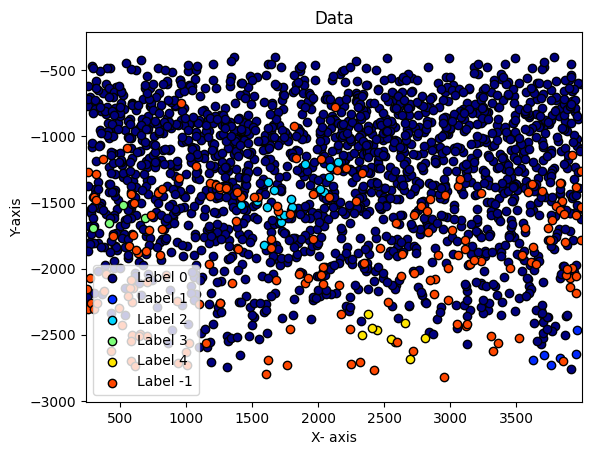

number of noise = 176


In [18]:
Q_mat = PCA(cov_matrix , 4) 
comp_X = np.dot(X , Q_mat) 
size , Y_hat , noise  = DBSCAN(comp_X , 330, 8)

plot(X_plot , Y_hat ,'X- axis' , 'Y-axis' , 'Data')
print("number of noise =", len(noise))